In [ ]:
# need to clean data first
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv",low_memory=False)
print(df.info())
df = df.dropna(subset=['PD_DESC','OFNS_DESC'])
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
#removed rows with latitude less than 41 because outside of new york city boroughs
df = df.loc[df['Latitude']<41]
#convert ARREST_DATE column to a datetime type
df_years={}
for i in range(2007,2021):
    df_years[i] = df[df['ARREST_DATE'].dt.year == i]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
arrest_count = df.groupby('ARREST_DATE')
boroughs = ['M','Q','K','S','B']
#loop through boroughs to check the amount of time the selected crime occurs
for borough in boroughs:
    figure(figsize=(18,6))
    borough_df = df[df['ARREST_BORO']==borough].groupby('ARREST_DATE')
    temp_df = pd.DataFrame(columns = ['ARREST_DATE', 'COUNT'])
    for key,item in arrest_count:
        #print(arrest_count.get_group(key).OFNS_DESC.value_counts())
        #print(arrest_count.get_group(key).OFNS_DESC.value_counts()['ASSAULT 3 & RELATED OFFENSES'])
        #returns the number of count for that associated crime
        #try and except here just in case if there is an empty value
        try:
            #adjust the crime here to check which we want
            temp_df  = temp_df.append({'ARREST_DATE':key,'COUNT':borough_df.get_group(key).OFNS_DESC.value_counts()['ASSAULT 3 & RELATED OFFENSES']},ignore_index=True)
        except:
            temp_df  = temp_df.append({'ARREST_DATE':key,'COUNT':0},ignore_index=True)
    temp_df = temp_df.set_index('ARREST_DATE')
    plt.title(borough + ' ASSAULT 3 & RELATED OFFENSES')
    plt.plot(temp_df)
    plt.show()
#used to see if the difference in crimes between boroughs, if we can make any assumptions


In [12]:

df_temp = df_years[2009]
unique_ofns = df_temp['PD_DESC'].unique()
temp = df.groupby('OFNS_DESC').count().sort_values(by= ['ARREST_KEY'],ascending=False).head()
top_five_ofns = ['DANGEROUS DRUGS','ASSAULT 3 & RELATED OFFENSES','OTHER OFFENSES RELATED TO THEFT','OTHER STATE LAWS','PETIT LARCENY']
#check the amount of crime for each unique crime and create a list of the top 5

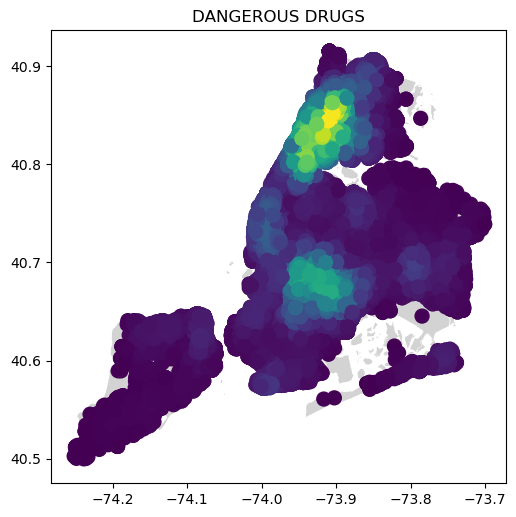

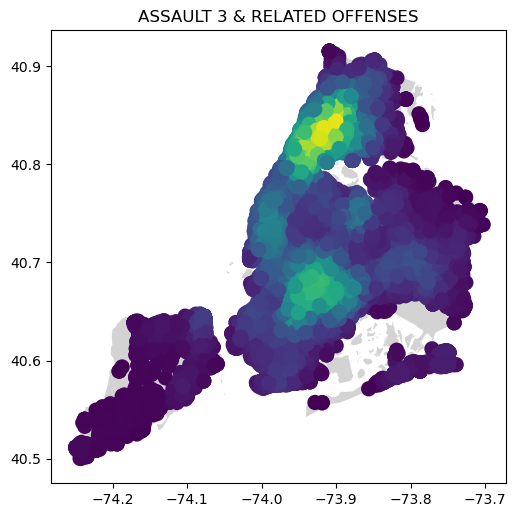

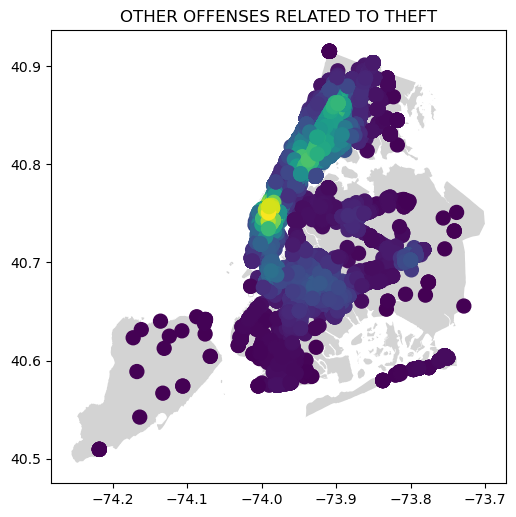

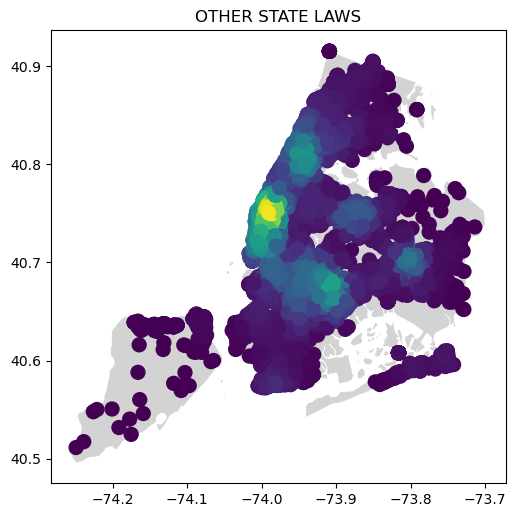

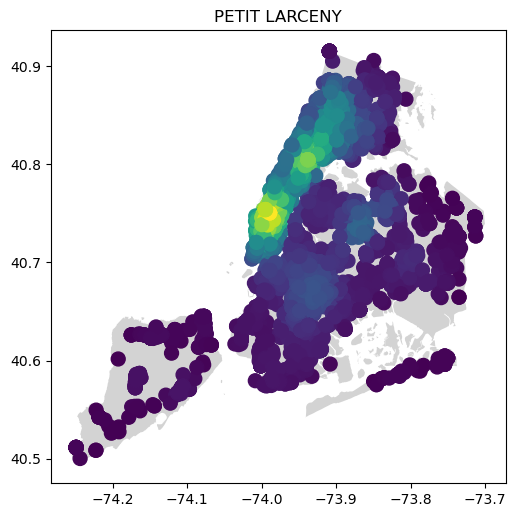

In [13]:
#visualize where the concentration of certain crimes are in NYC
import geopandas
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
for ofns in top_five_ofns:
    #creates the map
    boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))
    fig,ax = plt.subplots(figsize=(8,6),dpi=100)
    boros.to_crs("EPSG:4326").plot(color="lightgrey",ax=ax)
    df_ofns = df_temp[df_temp['OFNS_DESC']==ofns]
    x = df_ofns['Latitude'].tolist()
    y =  df_ofns['Longitude'].tolist()
    xy = np.vstack([x,y])
    #creates the density
    z = gaussian_kde(xy)(xy)
    ax.scatter(y, x, c=z, s=100)
    plt.title(ofns)
    #df_2007.plot(x="Longitude", y="Latitude", kind="scatter",colormap="YlOrRd",ax=ax)
    plt.show()
#show the density of the top 5 crimes in each borough